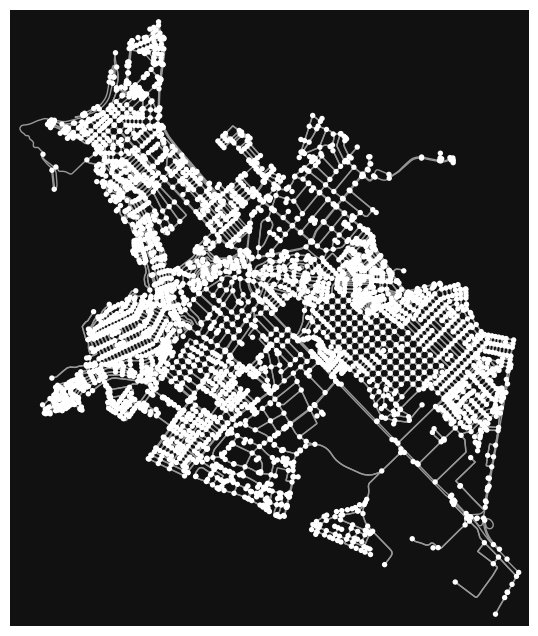

[310954593, 371264086, 371264146, 1229283791, 1229283812, 310955280, 310954567, 4226846551, 4226846563, 10030064789, 304905111, 309583793, 310955011, 309583778, 304905226, 310955146, 10861774747, 1766564358, 10861774749, 304905146, 304905184, 1229111518, 304905145, 306073629, 304905225, 304905220, 10861774745, 304905212, 1753892132, 1844848296, 5396196933, 1804671513, 9168839366, 9168814354, 5396196929, 1273981840, 1804671519, 1753892133, 5467999290, 5396196931, 1273870334, 1273730904, 5467991250, 3743408700, 4351598102, 4351598077, 3574806293, 2833643628, 2833643635, 10923619480, 2833643630, 1701366951, 309582256, 7098799266, 7084321877, 2833643637, 7084321854, 3758360385, 3758360355, 5473679126, 3758368369, 4199039335, 3758368329, 1273621184, 3758368351, 3758368368, 3758368330, 3758368345, 3758368350, 3758368349, 1701366894, 1701366890, 1701366887, 1701366828, 4941401548, 1229111517, 1229111519, 5008490468, 5008490469, 4232976302, 1783964576, 1273883219, 1273705048, 4443267300, 17839

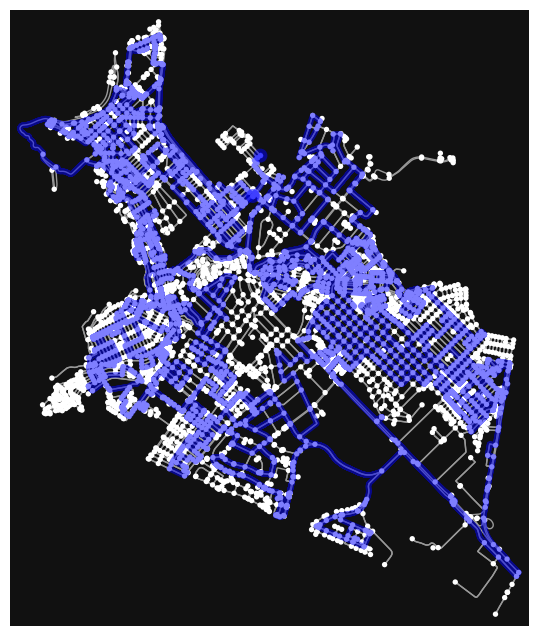

La distancia total de la ruta propuesta es de 888410.6874362726 metros.


In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
import math

# Obtener el grafo
place_name = "Chorrillos, Lima, Peru"
G = ox.graph_from_place(place_name, network_type='drive')

# Obtener iglesias
tags  = {'amenity': 'place_of_worship', 'religion': 'christian'}  # Tags para buscar iglesias
churches= ox.features_from_place(place_name, tags)
churches = churches[churches.geometry.type == 'Point']

# Convertir los nodos a un DataFrame
#nodes, edges = ox.graph_to_gdfs(G)

# Visualizar el gráfico de red
fig, ax = ox.plot_graph(G)
plt.show()

church_nodes = []
for idx, church in churches.iterrows():
    point = church.geometry
    nearest_node = ox.nearest_nodes(G, point.x, point.y)  # Usamos nearest_nodes
    church_nodes.append(nearest_node)

# Función para encontrar la ruta DFS entre dos nodos
def dfs_path(graph, start, goal):
    # Genera un árbol DFS desde el nodo de inicio
    dfs_tree = nx.dfs_tree(graph, source=start)
    # Intentar encontrar un camino al nodo objetivo
    try:
        path = nx.shortest_path(dfs_tree, source=start, target=goal)
        return path
    except nx.NetworkXNoPath:
        return None

# Implementar DFS para recorrer las iglesias
route = []
current_node = church_nodes[0]
for next_node in church_nodes[1:]:
    path = dfs_path(G, current_node, next_node)
    if path:
        route.extend(path[:-1])  # Evitar duplicar nodos
    current_node = next_node

# Agregar el último segmento para cerrar el ciclo
route.append(current_node)
print(route)

# Dibujar el grafo
fig, ax = ox.plot_graph(G, show=False, close=False)
route_edges = list(zip(route[:-1], route[1:]))
nc = ['r' if node in route else 'b' for node in G.nodes()]
ox.plot_graph_route(G, route, route_color='blue', orig_dest_node_color='red', node_color=nc, ax=ax)
plt.show()

def calculate_route_length(route, graph):
    length = 0.0
    for i in range(len(route) - 1):
        edge_data = graph.get_edge_data(route[i], route[i+1])
        length += edge_data[0]['length']  # Asume que la longitud está en edge_data[0]['length']
    return length

# Suponiendo que 'route' es la lista de nodos de tu ruta ya calculada
total_length = calculate_route_length(route, G)
print(f"La distancia total de la ruta propuesta es de {total_length} metros.")
